In [1]:
import torch
import torchvision

In [2]:
torch.__version__

'2.3.1+cu118'

In [158]:
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights, MaskRCNN_ResNet50_FPN_V2_Weights

In [159]:
model = maskrcnn_resnet50_fpn_v2(weight=MaskRCNN_ResNet50_FPN_V2_Weights).to("cuda")


model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [161]:
transform = MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1.transforms()
transform

ObjectDetection()

In [74]:
import numpy as np

In [75]:
from PIL import Image

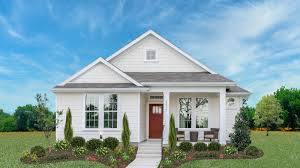

In [76]:
img = Image.open("images.jpg")

img

In [162]:
x = np.array([transform(img)])
x = torch.from_numpy(x).to("cuda")

In [163]:
predictions = model(x)


In [164]:
predictions[0].keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [165]:
len(predictions[0]["boxes"])


100

In [166]:
predictions[0]["scores"]


tensor([0.9996, 0.9996, 0.9995, 0.9995, 0.9995, 0.9994, 0.9994, 0.9993, 0.9992,
        0.9991, 0.9990, 0.9990, 0.9990, 0.9990, 0.9989, 0.9988, 0.9987, 0.9986,
        0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9981, 0.9980, 0.9979, 0.9978,
        0.9976, 0.9975, 0.9974, 0.9974, 0.9972, 0.9970, 0.9968, 0.9968, 0.9966,
        0.9965, 0.9964, 0.9964, 0.9963, 0.9962, 0.9961, 0.9959, 0.9957, 0.9956,
        0.9956, 0.9951, 0.9950, 0.9950, 0.9950, 0.9948, 0.9947, 0.9946, 0.9946,
        0.9946, 0.9945, 0.9945, 0.9943, 0.9941, 0.9939, 0.9936, 0.9931, 0.9930,
        0.9929, 0.9926, 0.9926, 0.9926, 0.9925, 0.9924, 0.9923, 0.9923, 0.9922,
        0.9921, 0.9921, 0.9919, 0.9919, 0.9913, 0.9911, 0.9909, 0.9909, 0.9908,
        0.9907, 0.9906, 0.9904, 0.9903, 0.9900, 0.9899, 0.9898, 0.9897, 0.9896,
        0.9896, 0.9895, 0.9894, 0.9892, 0.9892, 0.9892, 0.9884, 0.9881, 0.9878,
        0.9877], device='cuda:0', grad_fn=<IndexBackward0>)

In [167]:
predictions[0]["labels"]

tensor([59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 82, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 82, 59, 59,
        59, 59, 59, 59, 82, 59, 59, 59, 59, 82], device='cuda:0')

In [126]:
len(predictions[0]["masks"])

100

In [112]:
len(predictions[0]["masks"])

100

In [113]:
predictions[0]["masks"][predictions[0]["labels"][0]]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [143]:
predictions[0]["masks"][0] > 0.7

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')

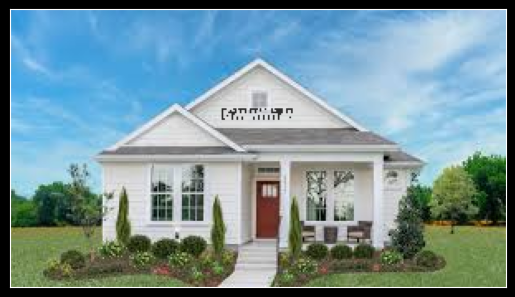

In [168]:
from torchvision.utils import draw_segmentation_masks
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        

from torchvision.utils import draw_segmentation_masks

dogs_with_masks = [
    draw_segmentation_masks(transform(img), masks=predictions[0]["masks"][0]>0.7)
]
show(dogs_with_masks)
        

In [54]:
from numpy import dtype

for i in range(100):
  print(np.unique(predictions[0]["masks"][i].cpu().detach().numpy().astype(np.int8), return_counts=True))

(array([0, 1], dtype=int8), array([199957,     43], dtype=int64))
(array([0, 1], dtype=int8), array([199992,      8], dtype=int64))
(array([0, 1], dtype=int8), array([199985,     15], dtype=int64))
(array([0, 1], dtype=int8), array([199994,      6], dtype=int64))
(array([0, 1], dtype=int8), array([199967,     33], dtype=int64))
(array([0, 1], dtype=int8), array([199720,    280], dtype=int64))
(array([0, 1], dtype=int8), array([197310,   2690], dtype=int64))
(array([0, 1], dtype=int8), array([197389,   2611], dtype=int64))
(array([0, 1], dtype=int8), array([199770,    230], dtype=int64))
(array([0, 1], dtype=int8), array([199999,      1], dtype=int64))
(array([0, 1], dtype=int8), array([199196,    804], dtype=int64))
(array([0, 1], dtype=int8), array([199980,     20], dtype=int64))
(array([0, 1], dtype=int8), array([196229,   3771], dtype=int64))
(array([0, 1], dtype=int8), array([199864,    136], dtype=int64))
(array([0], dtype=int8), array([200000], dtype=int64))
(array([0, 1], dtype=

In [ ]:
np.count

In [43]:
predictions[0]["masks"][0].shape

torch.Size([1, 500, 400])

In [37]:
predictions[0]["masks"][0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [4]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

In [5]:
model = get_model_instance_segmentation(1)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth
100%|██████████| 177M/177M [00:02<00:00, 67.1MB/s] 
